<a href="https://colab.research.google.com/github/Imran-Github22/Programming-For-Data/blob/main/10_2_Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Mini-project
---

In the previous worksheet you converted an SQL relational database to a single pandas dataframe and downloaded it. You will be analysing it today.

If you were unable to download the file, there is a copy located here: 

"https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"



### Inspect the dataset 
---

In [1]:
url = 'https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true'
def create_dataframe(url):
  import pandas as pd
  df = pd.read_csv(url)
  return df

movies_df = create_dataframe(url)

display(movies_df.info())
display(movies_df.describe())
display(movies_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368894 entries, 0 to 368893
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 19.7+ MB


None

,Unnamed: 0,year,rank
count,368894.000000,368894.000000,113376.000000
mean,184446.500000,1969.442222,5.995124
std,106490.669438,29.082051,1.540330
min,0.000000,1888.000000,1.000000
25%,92223.250000,1947.000000,5.100000
50%,184446.500000,1976.000000,6.200000
75%,276669.750000,1996.000000,7.100000
max,368893.000000,2007.000000,9.900000


,Unnamed: 0,first_name,last_name,name,year,rank,genre
0,0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short


### Clean the dataset 
---


In [2]:
movies_df = movies_df.drop(columns=['Unnamed: 0'])
movies_df.drop_duplicates(inplace=True)
movies_df.info()
movies_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368893 entries, 0 to 368893
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   first_name  368893 non-null  object 
 1   last_name   368893 non-null  object 
 2   name        368893 non-null  object 
 3   year        368893 non-null  int64  
 4   rank        113376 non-null  float64
 5   genre       368893 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 19.7+ MB


,first_name,last_name,name,year,rank,genre
0,Les,12 Poissons,Rondo pour trompette,2002,NaN,Short
1,Lejaren,a'Hiller,"Sleep of Cyma Roget, The",1920,NaN,Drama
2,Khairiya,A-Mansour,Churches in Iraq,1988,NaN,Documentary
3,Ricardo,A. Solla,"Foto, La",2001,NaN,Drama
4,Ricardo,A. Solla,"Foto, La",2001,NaN,Short


### How many movies of each genre are there?
---

In [3]:
def get_movies_by(df, column='genre'):
  df_grouped = df.groupby(column)['name'].count()
  return df_grouped

#display(get_movies_by(movies_df, ['year', 'rank']))
display(get_movies_by(movies_df))

genre
Action         12890
Adventure       8598
Animation      17038
Comedy         54667
Crime          12610
Documentary    35697
Drama          72635
Family         11074
Fantasy         4871
Film-Noir        429
Horror          7423
Music           4444
Musical         6843
Mystery         4951
Romance        13562
Sci-Fi          4957
Short          72894
Thriller       10681
War             4398
Western         8231
Name: name, dtype: int64

### Which director has the highest ranked movies?
---

In [4]:
def get_highest_rank_movies(df):
  max_rank = df['rank'].max(skipna=True)
  df_filtered = df[df['rank'] == max_rank]
  return df_filtered

display(get_highest_rank_movies(movies_df))

,first_name,last_name,name,year,rank,genre
7981,Isidor,Annensky,Svadba,1944,9.9,Comedy
19264,Scott,Barkan,Dawn of the Friend,2004,9.9,Comedy
19265,Scott,Barkan,Dawn of the Friend,2004,9.9,Horror
19266,Scott,Barkan,Dawn of the Friend,2004,9.9,Short
26589,Ishmael,Bernal,Himala,1982,9.9,Drama
34471,Satyen,Bose,Dosti,1964,9.9,Drama
34472,Satyen,Bose,Dosti,1964,9.9,Family
34473,Satyen,Bose,Dosti,1964,9.9,Musical
36186,Julio (I),Bracho,Distinto amanecer,1943,9.9,Drama
36187,Julio (I),Bracho,Distinto amanecer,1943,9.9,Romance


### How many movies have ranks of over 9?
---


In [5]:
def get_above_rank_9_movies(df, rank=9):
  max_rank = rank
  df_filtered = df[df['rank'] > max_rank]
  return df_filtered

total_above_9_rank_movies = len(get_above_rank_9_movies(movies_df))
print(f'Total above 9 rank movies:    {total_above_9_rank_movies}')

Total above 9 rank movies:    1483


### Plot a bar chart of mean rank and genre
---

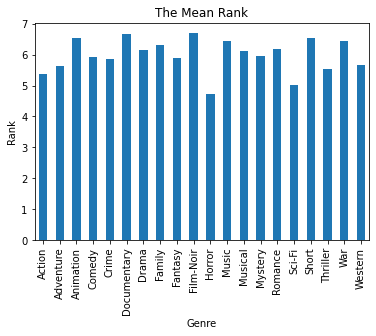

In [6]:
def show_barchart_rank_genre(df):
  import matplotlib.pyplot as plt

  rank_genre_df = df[['rank', 'genre']]
  df_grouped = rank_genre_df.groupby('genre')['rank'].mean()
  # Draw the bar graph
  df_grouped.plot(x='genre', y=df_grouped, kind='bar')

  plt.xlabel('Genre')
  plt.ylabel('Rank')
  plt.title('The Mean Rank')
  #plt.xticks(rotation=45)
  plt.show()

show_barchart_rank_genre(movies_df)

### Plot a pie chart of how many movies of each genre there are 
---


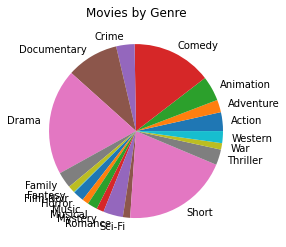

In [7]:
def show_pieplot_name_genre(df):
  import matplotlib.pyplot as plt

  rank_genre_df = df[['name', 'genre']]
  df_grouped = rank_genre_df.groupby('genre')['name'].count()

  # Draw the pie plot
  plt.pie(df_grouped, labels=df_grouped.keys())
  plt.title('Movies by Genre')
  plt.show()

show_pieplot_name_genre(movies_df)

### Plot a graph showing the mean Rank for each year 

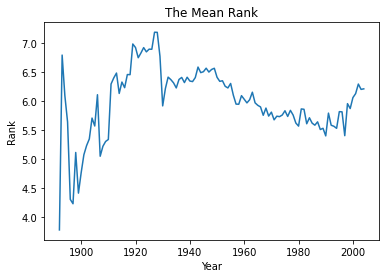

In [8]:
def show_barchart_rank_year(df):
  import matplotlib.pyplot as plt

  rank_year_df = df[['rank', 'year']]
  df_grouped = rank_year_df.groupby('year')['rank'].mean()
  # Draw the line graph
  df_grouped.plot(x='year', y=df_grouped, kind='line')

  plt.xlabel('Year')
  plt.ylabel('Rank')
  plt.title('The Mean Rank')
  plt.show()

show_barchart_rank_year(movies_df)

### What else can you find out from this dataset?
---
Make a plan of 3 further things you can do to interrogate and analyse this dataset

Type your answer here  

1.  Highest ranked 'Comedy' movies?
2.  The year with the highest number of movies?
3.  Highest ranked 'Thriller' movies?

### Complete the tasks you have set out in the exercise above. 
---


In [9]:
def get_highest_ranked_comedy_movies(df):
  comedy_df = df[df['genre'] == 'Comedy']
  max_rank = comedy_df['rank'].max(skipna=True)
  df_filtered = comedy_df[comedy_df['rank'] == max_rank]
  df_filtered = df_filtered.sort_values(by='year', ascending=False)
  return df_filtered

display(get_highest_ranked_comedy_movies(movies_df))

,first_name,last_name,name,year,rank,genre
19264,Scott,Barkan,Dawn of the Friend,2004,9.9,Comedy
366480,Gregg,Zehentner,Dawn of the Friend,2004,9.9,Comedy
47670,Andrew,Cappelletti,"Whirlpool, The",2003,9.9,Comedy
67645,Matthew,Crandall,Prince Solitaire,2003,9.9,Comedy
328726,Debs,Tarrier,Blow Job,2002,9.9,Comedy
132970,Ivanka,Grybcheva,Voynata na taralezhite,1979,9.9,Comedy
7981,Isidor,Annensky,Svadba,1944,9.9,Comedy
151142,Ben,Holmes,Duck Soup,1942,9.9,Comedy


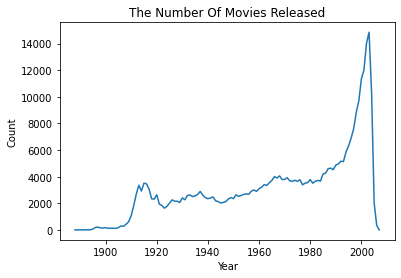

In [10]:
def show_movie_count_year(df):
  import matplotlib.pyplot as plt

  movie_count_df = df[['name', 'year']]
  df_grouped = movie_count_df.groupby('year')['name'].count()
  # Draw the line graph
  df_grouped.plot(x='year', y=df_grouped, kind='line')
  plt.xlabel('Year')
  plt.ylabel('Count')
  plt.title('The Number Of Movies Released')
  plt.show()

show_movie_count_year(movies_df)

In [11]:
def get_highest_ranked_thriller_movies(df):
  thriller_df = df[df['genre'] == 'Thriller']
  max_rank = thriller_df['rank'].max(skipna=True)
  df_filtered = thriller_df[thriller_df['rank'] == max_rank]
  df_filtered = df_filtered.sort_values(by='year', ascending=False)
  return df_filtered

display(get_highest_ranked_thriller_movies(movies_df))

,first_name,last_name,name,year,rank,genre
279870,Zack,Resnicoff,"Clearing, The",2001,9.9,Thriller
36188,Julio (I),Bracho,Distinto amanecer,1943,9.9,Thriller


# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer: Analysing a dataset, retrieving the information with different criterias and plotting the result sets in appropriate plots.

## What caused you the most difficulty?

Your answer: